# IMPORT

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
train_df["NObeyesdad"].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

| Column                           | Full Form                          | Description                                                                                                                                                                   |
|----------------------------------|------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 'id'                             | id                                 | Unique for each person (row)                                                                                                                                                  |
| 'Gender'                         | Gender                             | Person's gender                                                                                                                                                               |
| 'Age'                            | Age                                | Dtype is float. Age is between 14 years to 61 years                                                                                                                          |
| 'Height'                         | Height                             | Height is in meters and it's between 1.45m to 1.98m                                                                                                                           |
| 'Weight'                         | Weight                             | Weight is between 39 to 165. I think it's in kilograms.                                                                                                                       |
| 'family_history_with_overweight' | Family history with overweight    | Yes or no question about whether the person has a family history of overweight.                                                                                                |
| 'FAVC'                           | Frequent consumption of high calorie food | Yes or no question indicating whether the person consumes high calorie food frequently.                                                                                      |
| 'FCVC'                           | Frequency of consumption of vegetables | Yes or no question indicating the frequency of vegetable consumption.                                                                                                         |
| 'NCP'                            | Number of main meals              | Dtype is float. NCP is between 1 and 4. I think it should be 1, 2, 3, or 4, but our data is synthetic so it's taking float values.                                            |
| 'CAEC'                           | Consumption of food between meals | Takes 4 values: Sometimes, Frequently, No, and Always.                                                                                                                        |
| 'SMOKE'                          | Smoke                              | Yes or no question indicating whether the person smokes.                                                                                                                       |
| 'CH2O'                           | Consumption of water daily        | CH2O takes values between 1 and 3. It's given as a float, but it should be 1, 2, or 3.                                                                                       |
| 'SCC'                            | Calories consumption monitoring  | Yes or no question about whether the person monitors their calorie consumption.                                                                                                |
| 'FAF'                            | Physical activity frequency      | FAF is between 0 to 3. 0 means no physical activity and 3 means high workout. It's given as a float, but it should be integer values.                                        |
| 'TUE'                            | Time using technology devices    | TUE is between 0 to 2. It represents the time spent using technology devices to track health. It's given as a float, but it should be integer values.                       |
| 'CALC'                           | Consumption of alcohol           | Takes 3 values: Sometimes, No, and Frequently.                                                                                                                                 |
| 'MTRANS'                         | Transportation used               | MTRANS takes 5 values: Public_Transportation, Automobile, Walking, Motorbike, and Bike.                                                                                       |
| 'NObeyesdad'                     | TARGET                             | This is our target variable. It takes 7 values representing different levels of obesity risk. In this competition, we have to predict the class name (not the probability). |


### NObeyesdad
| Class                    | Description                                     | Range      |
|--------------------------|-------------------------------------------------|------------|
| Insufficient_Weight      | Less than 18.5                                  | < 18.5     |
| Normal_Weight            | 18.5 to 24.9                                    | 18.5-24.9  |
| Overweight_Level_I       | 25 to 29                                        | 25-29      |
| Obesity_Type_I           | 30.0 to 34.9                                    | 30.0-34.9  |
| Obesity_Type_II          | 35.0 to 39.9                                    | 35.0-39.9  |
| Obesity_Type_III         | Higher than 40                                  | > 40       |


# EDA

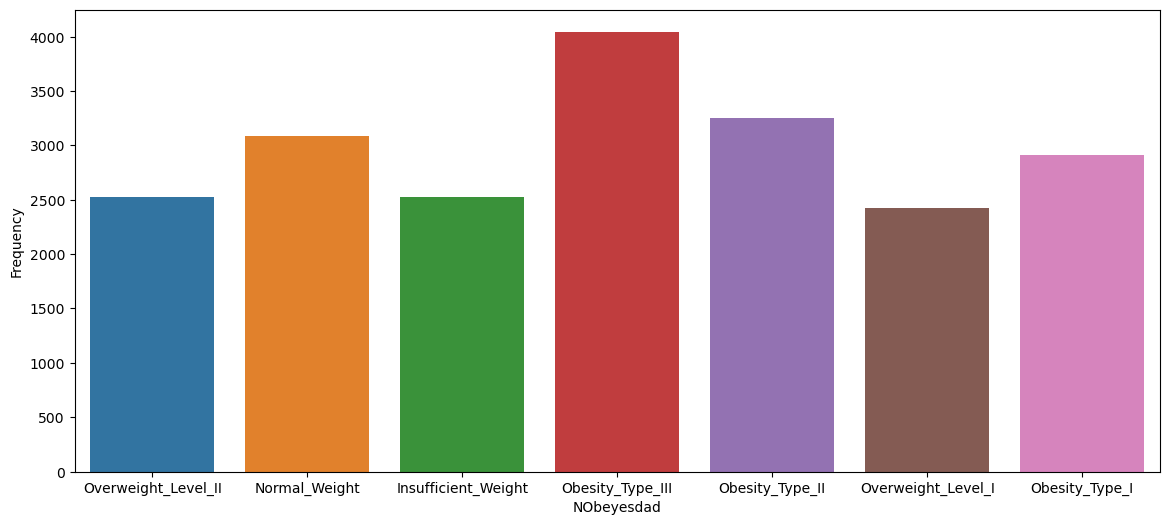

In [4]:
plt.figure(figsize=(14, 6)) 
sns.countplot(data = train_df, x = 'NObeyesdad')
plt.ylabel('Frequency');

In [5]:
categorical_feats = []

for column in train_df.columns :
    if train_df[column].dtype == 'object':
        categorical_feats.append(column)
        
print(categorical_feats) 

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [6]:
numerical_feats = []

for column in train_df.columns :
    if train_df[column].dtype != 'object':
        numerical_feats.append(column)
        
print(numerical_feats)  

['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


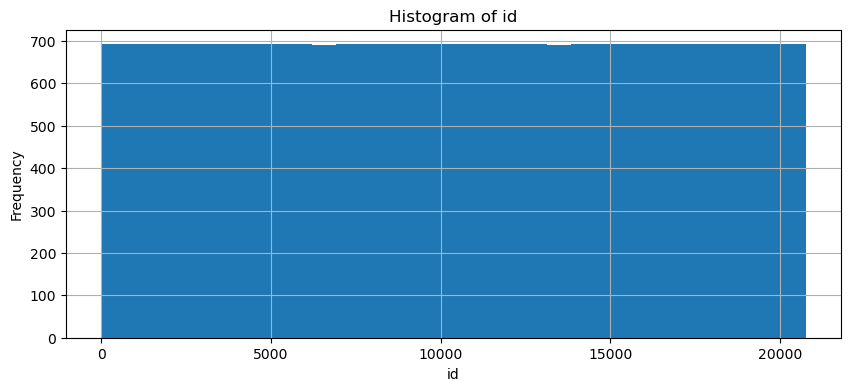

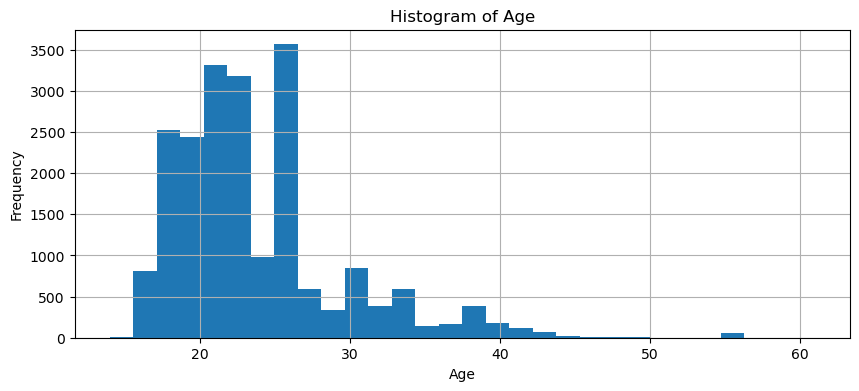

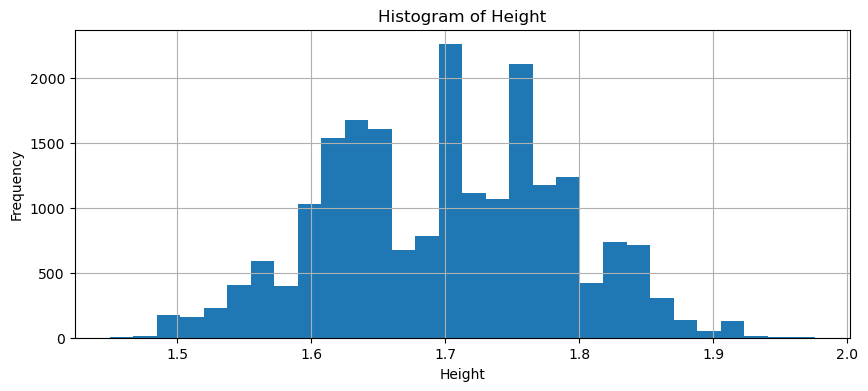

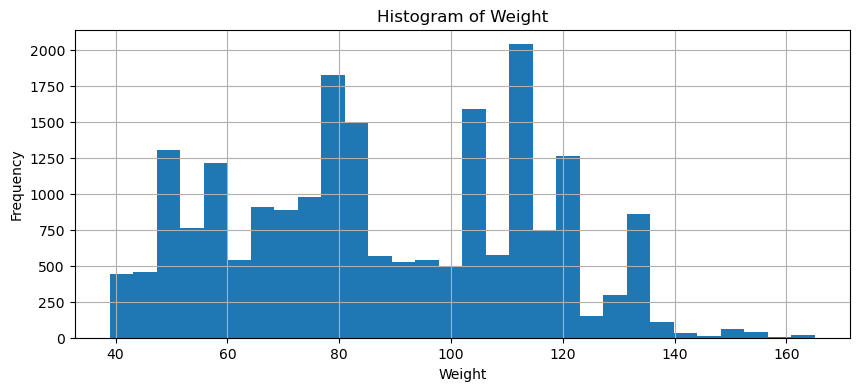

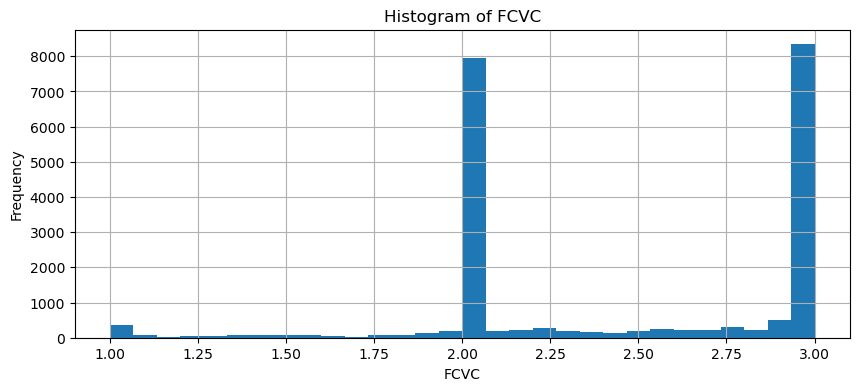

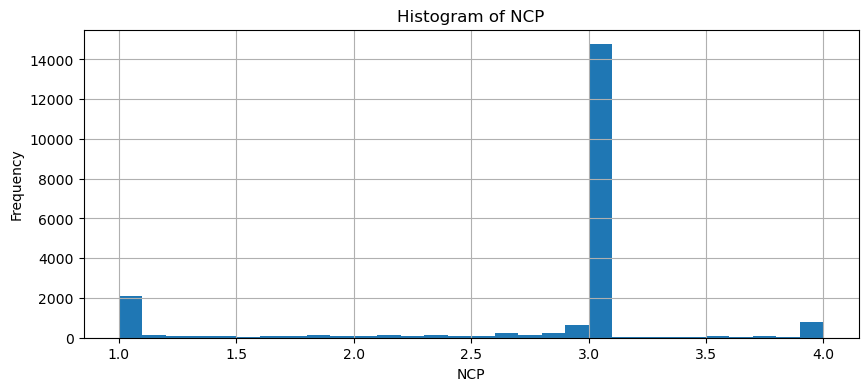

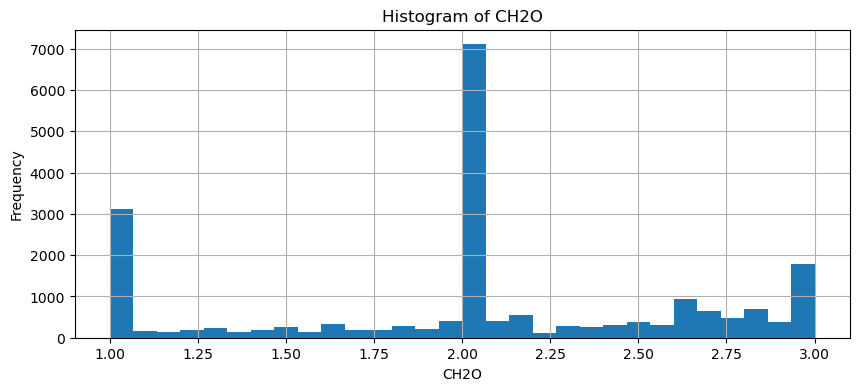

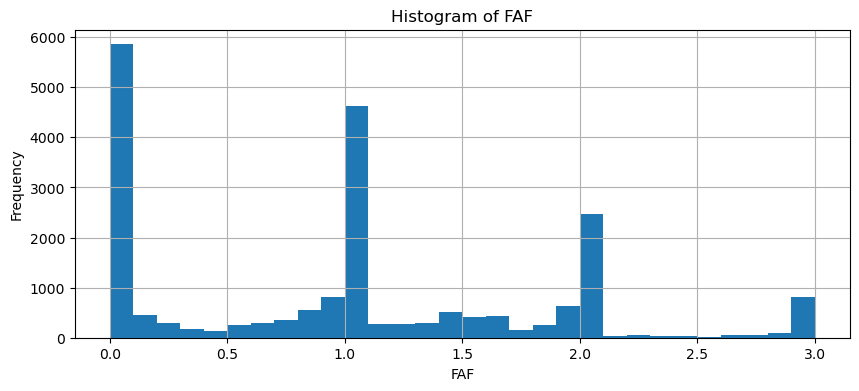

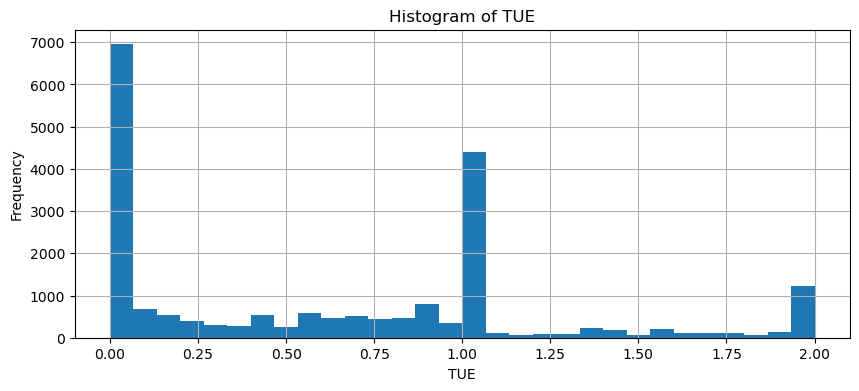

In [7]:
for feature in numerical_feats:
    plt.figure(figsize=(10, 4))
    train_df[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

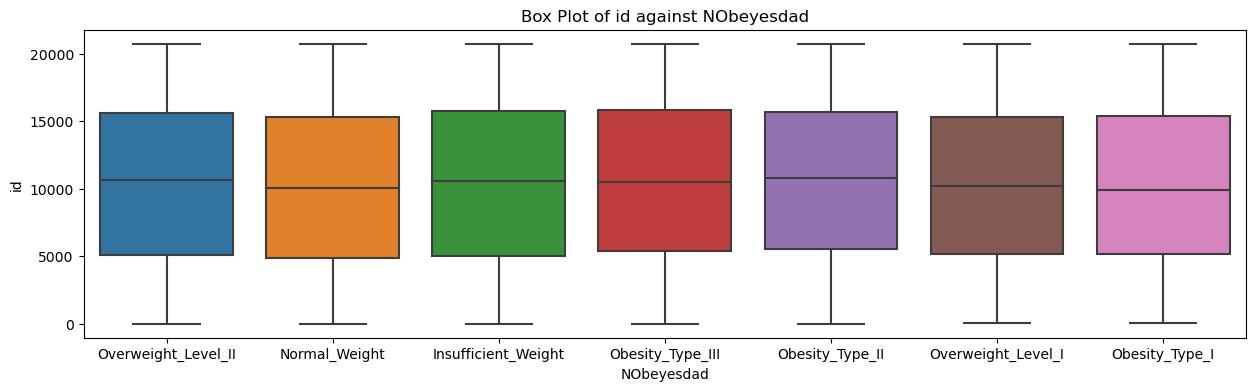

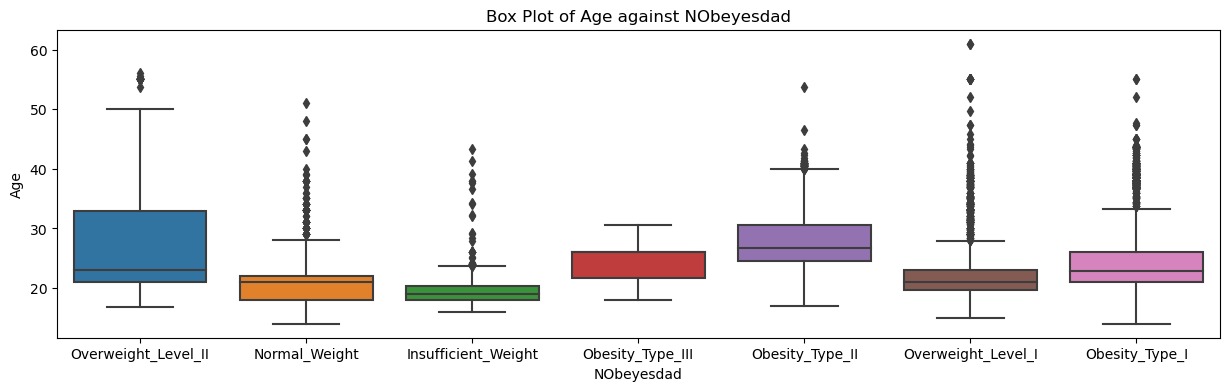

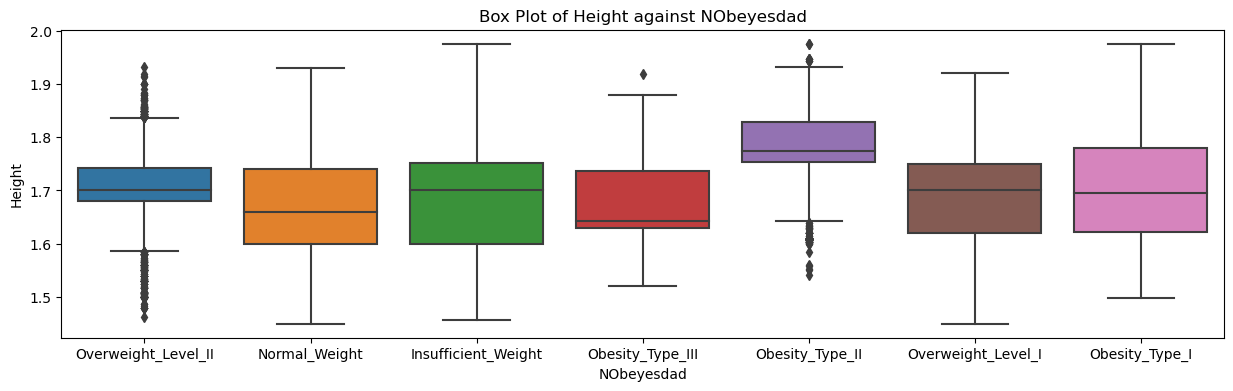

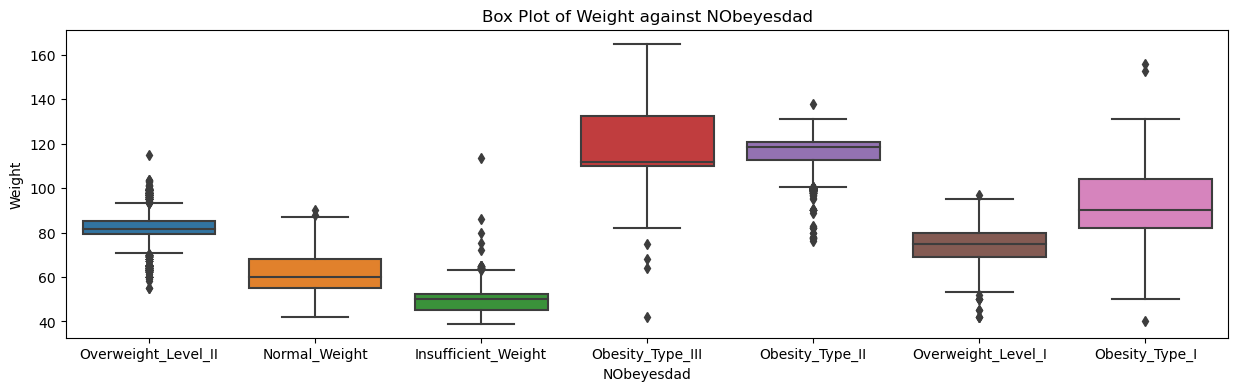

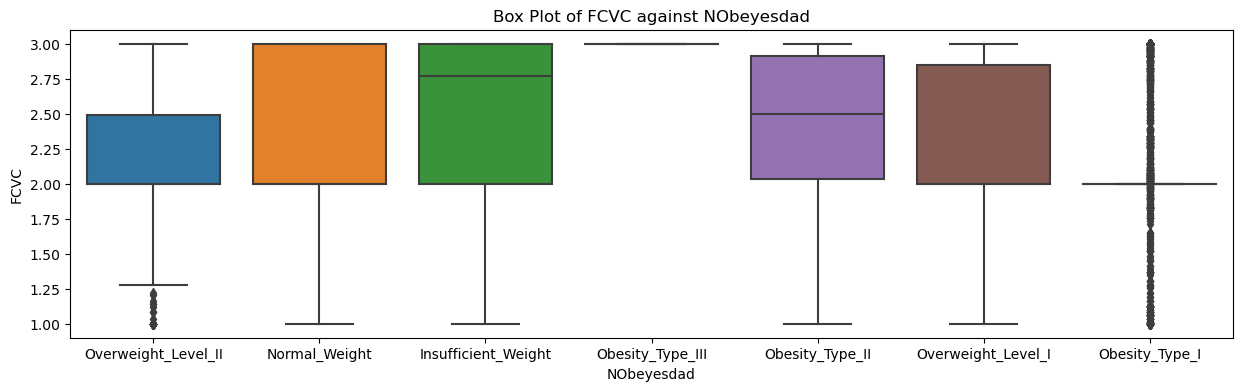

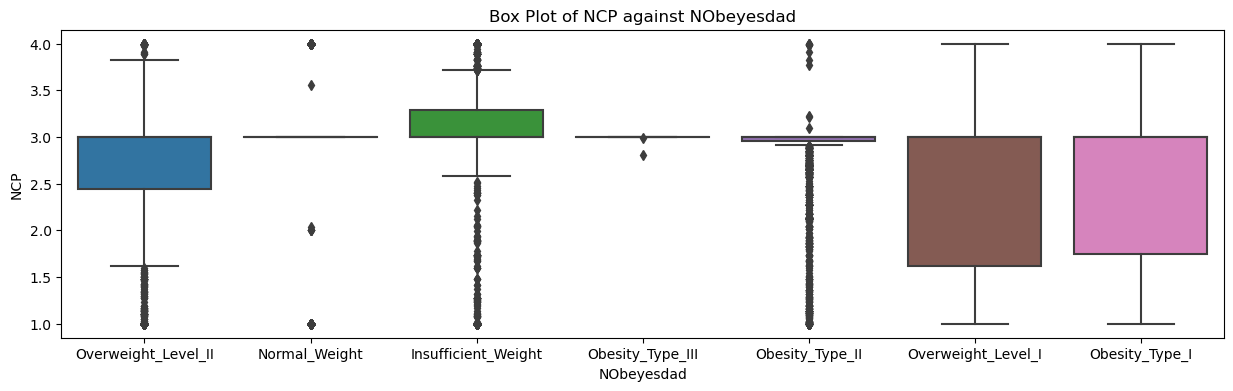

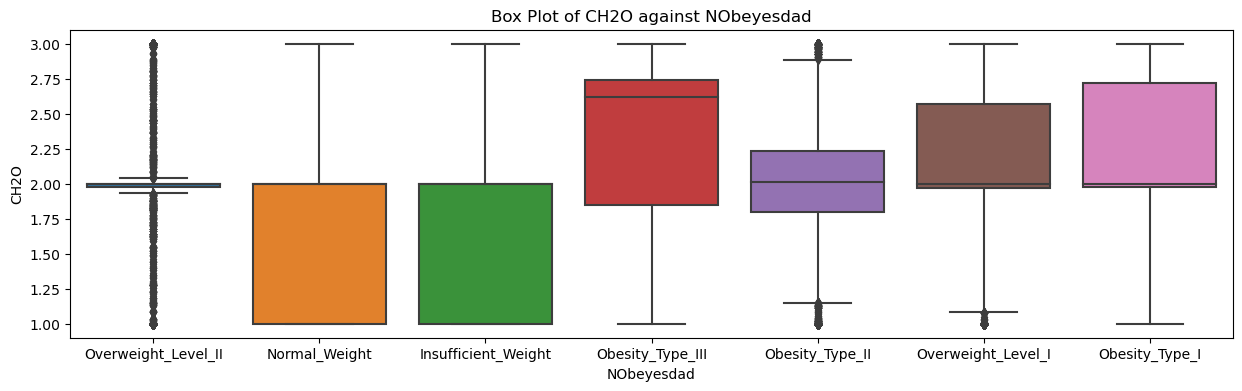

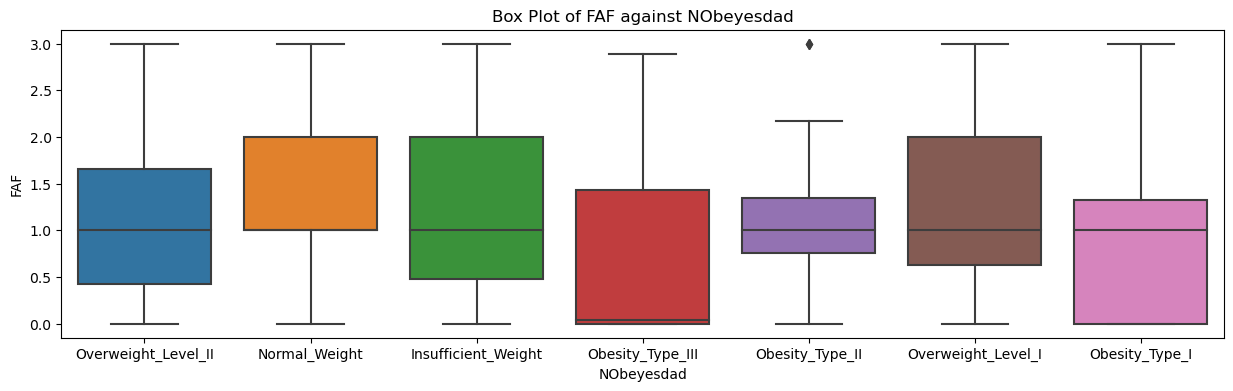

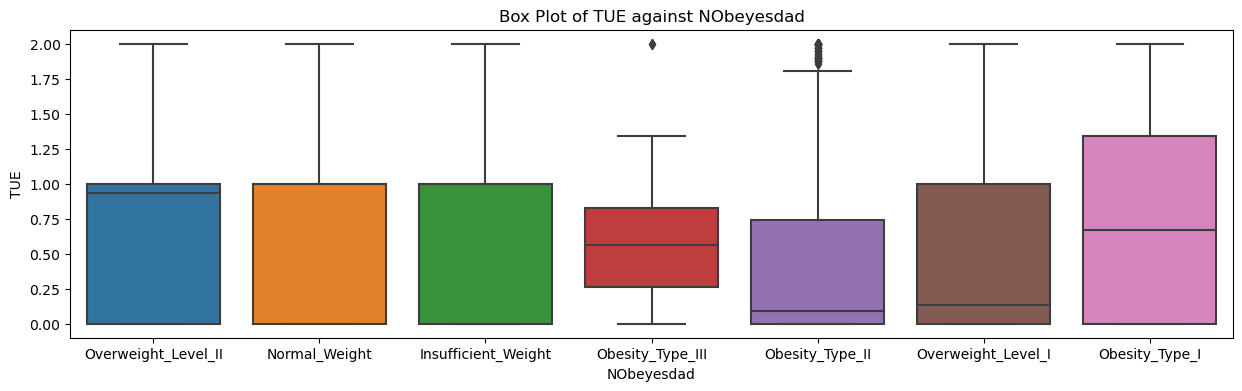

In [8]:
for feature in numerical_feats:
    plt.figure(figsize=(15, 4))
    sns.boxplot(x="NObeyesdad", y=feature, data=train_df)
    plt.title(f'Box Plot of {feature} against NObeyesdad')
    plt.show()

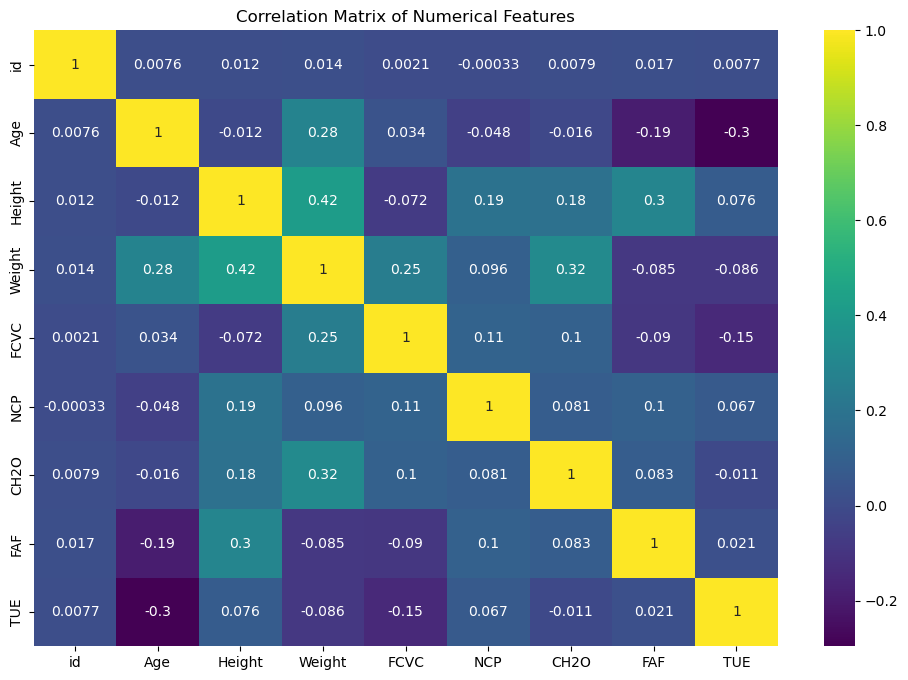

In [9]:
corr_matrix = train_df[numerical_feats].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

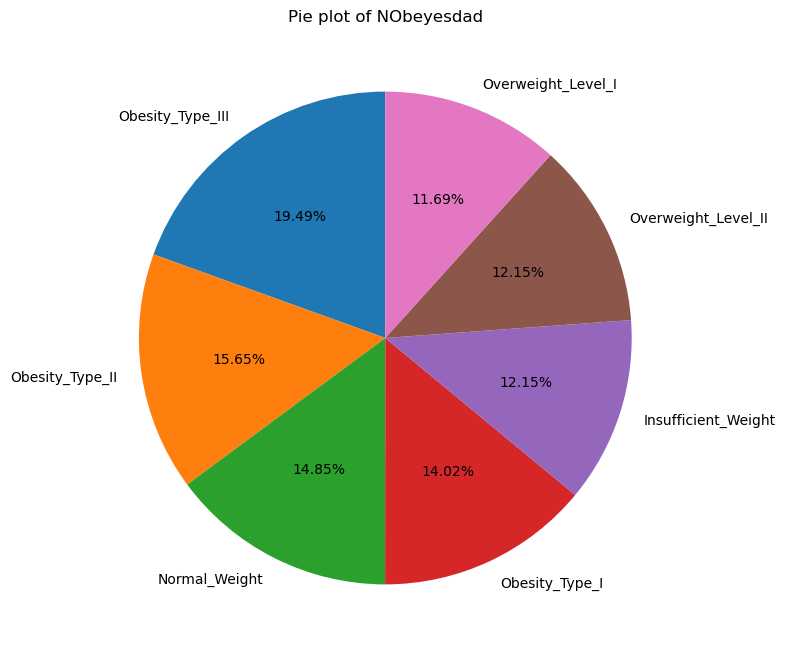

In [10]:
label_counts = train_df["NObeyesdad"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Pie plot of NObeyesdad')
plt.show();

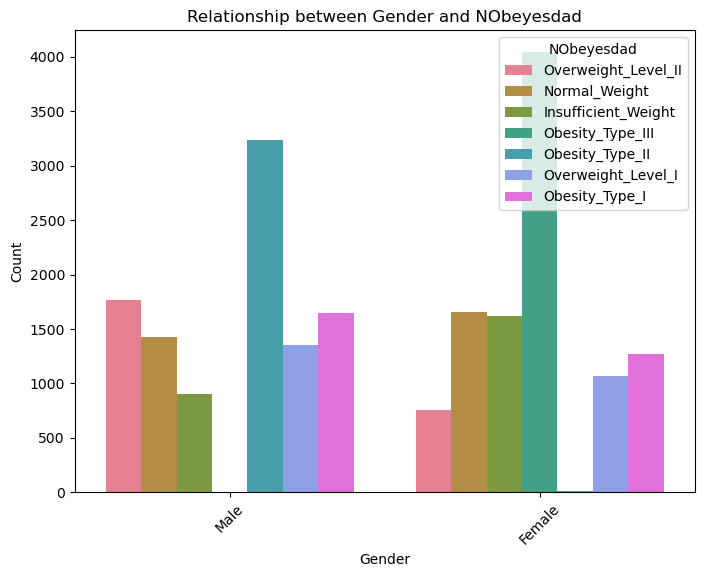

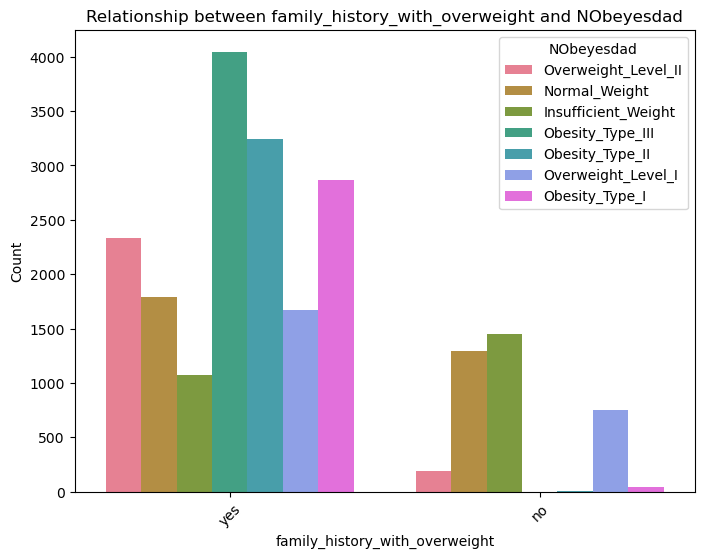

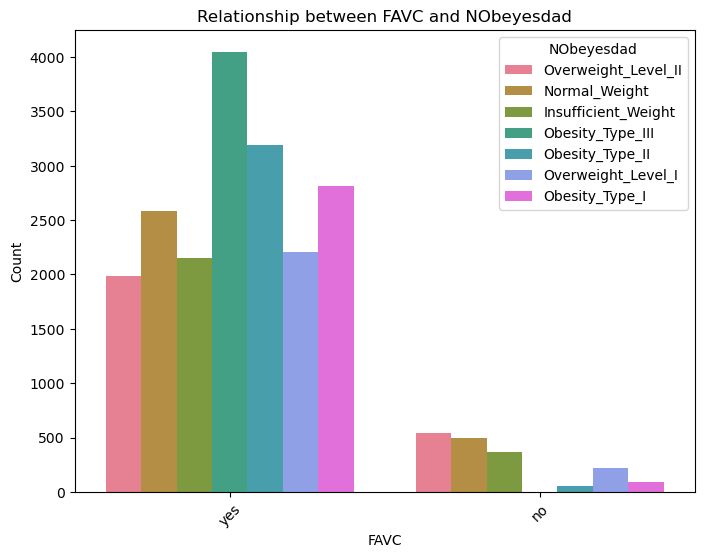

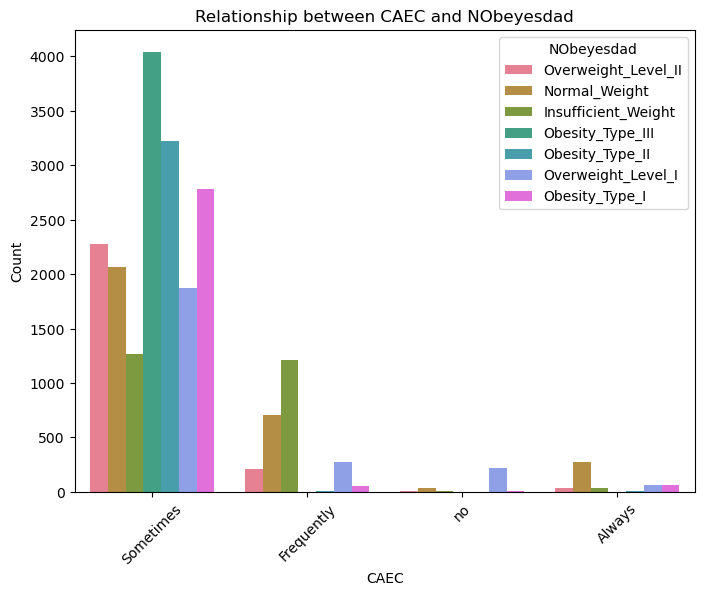

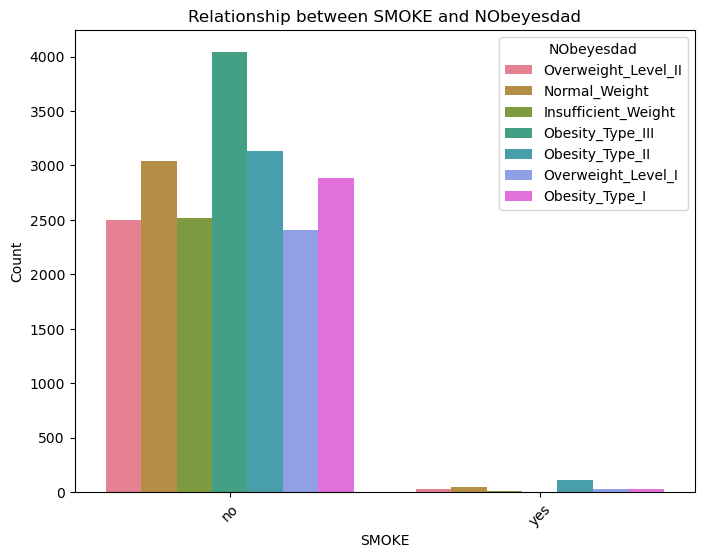

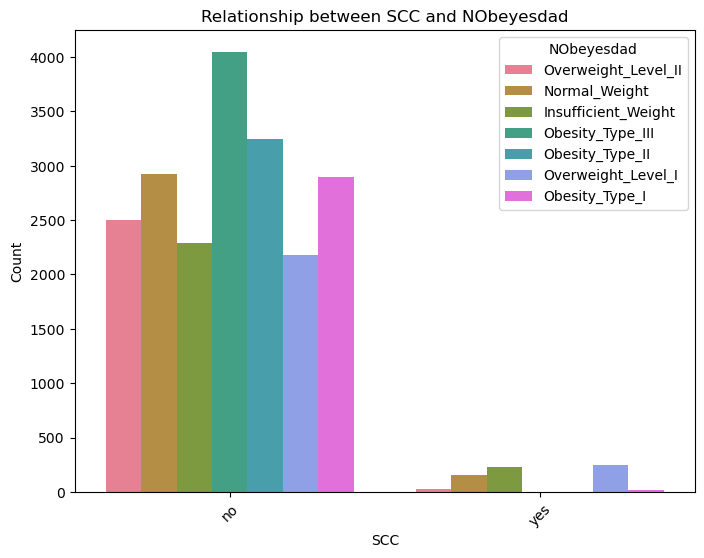

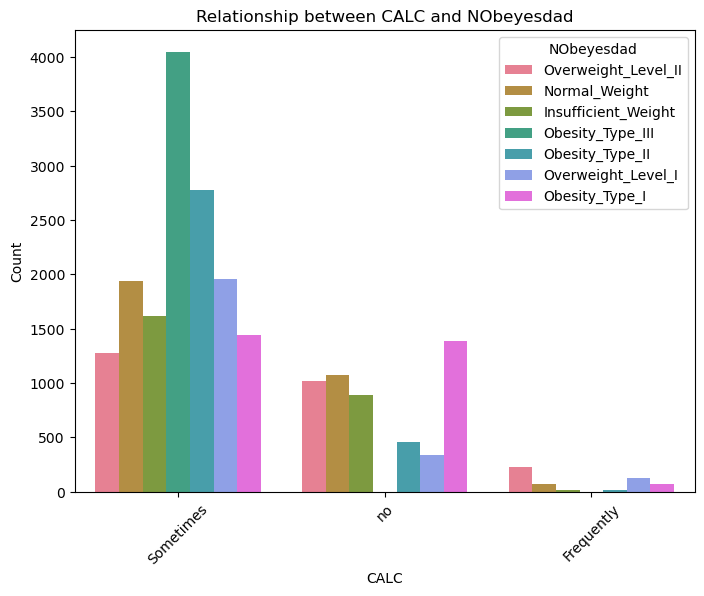

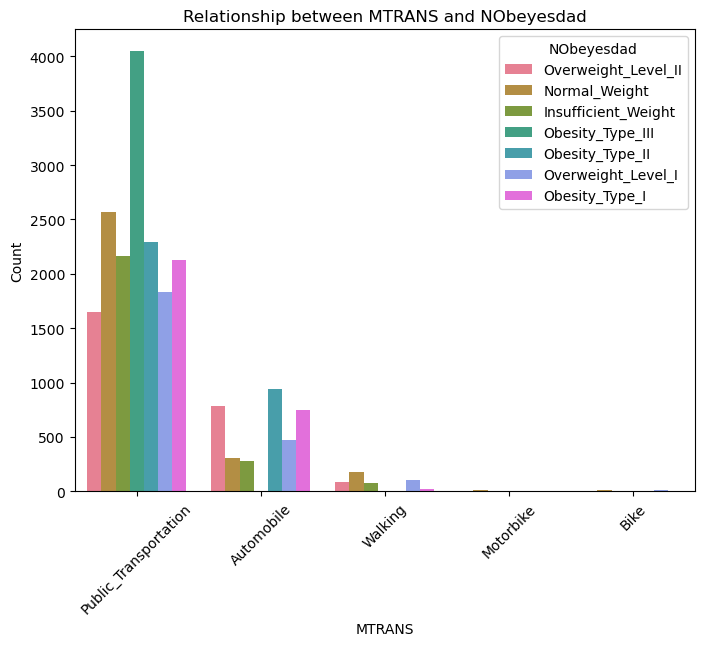

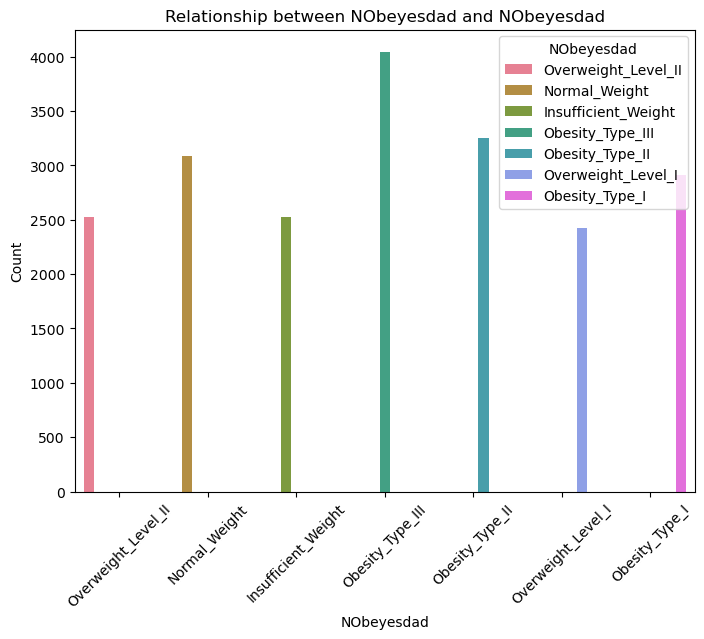

In [11]:

# Loop through each object column and create a count plot
for column in categorical_feats:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='NObeyesdad', data=train_df, palette='husl')
    plt.title(f'Relationship between {column} and NObeyesdad')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='NObeyesdad', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

# Feature engineering / preprocessing

In [12]:

def bmi_category(row):
    bmi = row['Weight'] / (row['Height'] ** 2)  
   
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Healthy weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi < 35:
        return "Obesity (Class 1)"
    elif 35 <= bmi < 40:
        return "Obesity (Class 2)"
    else:
        return "Obesity (Class 3)"

train_df['bmi_category'] = train_df.apply(bmi_category, axis=1)
test_df['bmi_category'] = test_df.apply(bmi_category, axis=1)

In [13]:
bmi_mapping = {
    "Underweight": 0,
    "Healthy weight": 1,
    "Overweight": 2,
    "Obesity (Class 1)": 3,
    "Obesity (Class 2)": 4,
    "Obesity (Class 3)": 5
}

train_df['bmi_category_encoded'] = train_df['bmi_category'].map(bmi_mapping)
test_df['bmi_category_encoded'] = test_df['bmi_category'].map(bmi_mapping)
train_df = train_df.drop(columns='bmi_category')
test_df = test_df.drop(columns='bmi_category')

In [14]:
train_df['NObeyesdad'].values

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', ...,
       'Obesity_Type_II', 'Overweight_Level_II', 'Obesity_Type_II'],
      dtype=object)

In [15]:
train_df["NObeyesdad"] = train_df["NObeyesdad"].map({'Normal_Weight':0,'Insufficient_Weight':1,'Overweight_Level_I':2 ,'Overweight_Level_II':3,'Obesity_Type_I':4 ,'Obesity_Type_II':5
                                  ,'Obesity_Type_III':6})


In [16]:
def map_df(train_df):
    train_df['Gender'] = train_df['Gender'].map({'Female':0, 'Male':1})
    train_df['SMOKE'] = train_df['SMOKE'].map({'no':0, 'yes':1})
    train_df['SCC'] = train_df['SCC'].map({'no':0, 'yes':1})
    train_df['CALC'] = train_df['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
    train_df['FAVC'] = train_df['FAVC'].map({'no':0, 'yes':1})
    train_df['family_history_with_overweight'] = train_df['family_history_with_overweight'].map({'no':0, 'yes':1})
    train_df['CAEC'] = train_df['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
    train_df['MTRANS'] = train_df['MTRANS'].map({'Bike':0,'Walking':1,'Motorbike':2,'Public_Transportation':3,'Automobile':4})
    return train_df
train_df = map_df(train_df)
test_df = map_df(test_df)

In [17]:
train_df.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,bmi_category_encoded
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,3,3,2
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,4,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,3,1,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,3,6,5
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,3,3,2


In [18]:
test_df.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi_category_encoded
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,3,4
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,3,2
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,3,5
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,3,5
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,3,4


In [19]:
y_train = train_df["NObeyesdad"].astype(int)

In [20]:
X_train = train_df.drop(["id", "NObeyesdad"], axis=1)

In [21]:
X_test = test_df.drop(["id"], axis=1)

In [22]:
X_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi_category_encoded
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,3,4
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,3,2
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,3,5
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,3,5
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,1,0,1.000000,0,0.807076,0.778632,1,3,2
13836,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,1,0,2.000000,0,0.000000,0.000000,1,3,1
13837,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,2,0,2.000000,0,1.949840,1.000000,1,3,0
13838,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,1,0,2.000000,0,3.000000,2.000000,0,3,1


### SAVE DATA

In [23]:

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)

X_train_df.to_csv("X_train.csv", index=False)


X_test_df.to_csv("X_test.csv", index=False)


y_train_df.to_csv("y_train.csv", index=False)